_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 32)        18464     
_________________________________________________________________
flatten_2 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                216330    
Total params: 235,434
Trainable params: 235,434
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 16s 342us/step - loss: 5.3816

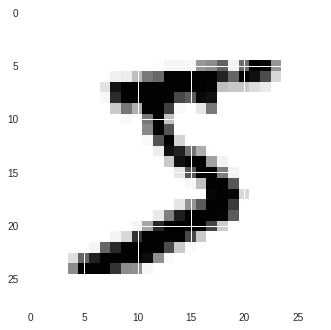

In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

import matplotlib.pyplot as plt
#plot the first image in the dataset

plt.imshow(x_train[0])

x_train.shape
x_test.shape

##Reshape the image to 16x16 and to grayscale
X_train=x_train.reshape(60000,28,28,1)
X_test=x_test.reshape(10000,28,28,1)

from keras.utils import to_categorical

Y_train=to_categorical(y_train)
Y_test=to_categorical(y_test)

Y_train.shape
Y_test.shape

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, BatchNormalization

##Initialise Sequential model
model = Sequential()


img_rows=28
img_cols=28
# Add a convolutional layer
model.add(Conv2D(64, kernel_size=3, activation='relu', 
                 input_shape=(img_rows, img_cols, 1), padding="same", strides=1))

# Add a dropout layer
model.add(Dropout(0.2))

# Add another convolutional layer
model.add(Conv2D(32, kernel_size=3, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

# Compile the model
model.compile(optimizer="adam", 
           loss="categorical_crossentropy", 
           metrics=['accuracy'])

#train the model
model.fit(X_train, Y_train, validation_split=0.2, epochs=3)

# Evaluate the model
accTest=model.evaluate(X_test, Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accTest[0],accTest[1]))

